<div style="background-color: #daf212; padding: 20px; border-radius: 10px;">
    <h1 style="color: #000000; front-size = 100px">SUPPORT VECTOR MACHINE</h1>
</div>

In [ ]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC , NuSVC , LinearSVC 
from sklearn.svm import SVR , NuSVR , LinearSVR
from sklearn.metrics import classification_report , accuracy_score
import warnings
warnings.filterwarnings('ignore')


In [4]:
from sklearn.datasets import load_iris

In [5]:
iris = load_iris()

In [6]:
dir(iris)

['DESCR',
 'data',
 'data_module',
 'feature_names',
 'filename',
 'frame',
 'target',
 'target_names']

In [7]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [8]:
df = pd.DataFrame(iris.data)

In [9]:
df.columns = iris.feature_names

In [10]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [11]:
df['target'] = iris.target

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [14]:
df.target.unique()

array([0, 1, 2])

In [19]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [21]:
df[df.target == 1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [22]:
df[df.target == 1].sum()

sepal length (cm)    296.8
sepal width (cm)     138.5
petal length (cm)    213.0
petal width (cm)      66.3
target                50.0
dtype: float64

In [27]:
df['flower_name'] = df.target.apply([lambda x : iris.target_names[x]])

In [28]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

In [29]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa


In [31]:
df0 = df[df.target == 0]
df1 = df[df.target == 1]
df2 = df[df.target == 2]

In [34]:
df1.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower_name
50,7.0,3.2,4.7,1.4,1,versicolor
51,6.4,3.2,4.5,1.5,1,versicolor
52,6.9,3.1,4.9,1.5,1,versicolor
53,5.5,2.3,4.0,1.3,1,versicolor
54,6.5,2.8,4.6,1.5,1,versicolor


# scatter plot 

Text(0, 0.5, 'sepal width')

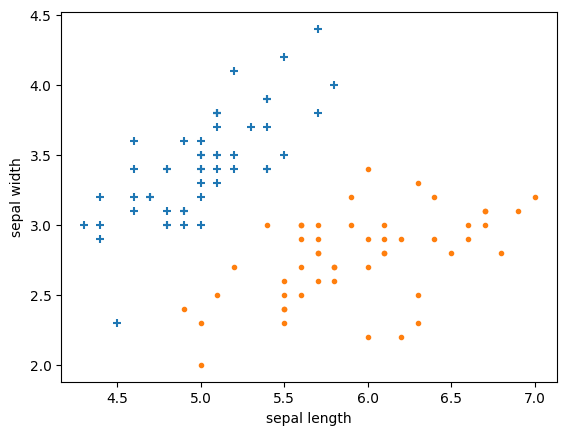

In [47]:
plt.scatter(df0['sepal length (cm)'],df0['sepal width (cm)'] , marker = '+')
plt.scatter(df1['sepal length (cm)'],df1['sepal width (cm)'] , marker = '.')
plt.xlabel('sepal length')
plt.ylabel('sepal width')

In [49]:
df.columns

Index(['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)',
       'petal width (cm)', 'target', 'flower_name'],
      dtype='object')

In [51]:
X = df.drop(['target' , 'flower_name'] , axis = 1)
y = df.target

In [52]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.24, random_state=0)

<div style="background-color: #a63dde; padding: 20px; border-radius: 10px;">
    <h1 style="color: #000000; front-size = 100px">svm classifier</h1>
</div>

In [54]:
svc = SVC()

In [55]:
svc.fit(X_train , y_train)

SVC()

In [57]:
y_pred = svc.predict(X_test)
y_pred 

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1])

In [60]:
accuracy_score(y_pred , y_test)

1.0

In [61]:
nusvc = NuSVC()

In [62]:
nusvc.fit(X_train , y_train)

NuSVC()

In [64]:
y_pred_nu = nusvc.predict(X_test)
y_pred_nu 

array([2, 1, 0, 2, 0, 2, 0, 1, 1, 1, 2, 1, 1, 1, 1, 0, 1, 1, 0, 0, 2, 1,
       0, 0, 2, 0, 0, 1, 1, 0, 2, 1, 0, 2, 2, 1])

In [65]:
accuracy_score(y_pred_nu , y_test)

1.0

In [66]:
linearsvc = LinearSVC()

In [67]:
linearsvc.fit(X_train , y_train)

LinearSVC()

In [68]:
y_pred_nu = linearsvc.predict(X_test)
y_pred_nu 
accuracy_score(y_pred_nu , y_test)

0.9444444444444444

<div style="background-color: #a63dde; padding: 20px; border-radius: 10px;">
    <h1 style="color: #000000; front-size = 100px">svm regressor</h1>
</div>

In [69]:
svr = SVR()

In [70]:
svr.fit(X_train , y_train)

SVR()

In [72]:
y_pred_svr = svr.predict(X_test) 

In [74]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test is your true labels and y_pred_svr are the predictions
mae = mean_absolute_error(y_test, y_pred_svr)
mse = mean_squared_error(y_test, y_pred_svr)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.1553869608265391
Mean Squared Error: 0.0408242308842058
Root Mean Squared Error: 0.20205007024053667
R-squared Score: 0.92917241870692


In [76]:
nusvr = NuSVR()

In [78]:
nusvr.fit(X_train , y_train)

NuSVR()

In [80]:
nussvr_pred = nusvr.predict(X_test)
nussvr_pred

array([ 2.05513739,  0.95633821, -0.0191095 ,  1.98892032, -0.02121468,
        2.23344602, -0.01167295,  1.26749661,  1.31051237,  0.95499447,
        1.84188929,  1.18705856,  1.27690077,  1.30248505,  1.35438545,
       -0.01948559,  1.31323507,  1.2631772 ,  0.02548077, -0.01583962,
        1.83339325,  1.35712467,  0.03472331,  0.07395591,  1.60205457,
        0.02912525,  0.0196248 ,  1.07544996,  0.78657115,  0.01104253,
        1.84490717,  1.38818843, -0.04223773,  1.62904267,  2.09497932,
        1.12907145])

In [81]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test is your true labels and y_pred_svr are the predictions
mae = mean_absolute_error(y_test, nussvr_pred)
mse = mean_squared_error(y_test, nussvr_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.1526124953833515
Mean Squared Error: 0.04071315445957547
Root Mean Squared Error: 0.20177500950210725
R-squared Score: 0.92917241870692


In [82]:
linear_svr = LinearSVR()

In [83]:
linear_svr.fit(X_train ,y_train)

C:\Users\nex20\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\svm\_base.py:1235: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


LinearSVR()

In [85]:
linear_svr_predict = linear_svr.predict(X_test)
linear_svr_predict

array([ 2.0003855 ,  0.94120385, -0.14025995,  1.75534211, -0.04289141,
        2.17287852, -0.02430027,  1.28951097,  1.25784436,  1.08657178,
        1.46410767,  1.26395448,  1.15671142,  1.30074003,  1.27565485,
       -0.13016822,  1.3063388 ,  1.14848985,  0.03678981, -0.01020637,
        1.72484935,  1.32477526,  0.0450945 ,  0.00473501,  1.54434027,
       -0.12515965,  0.12775946,  1.1313096 ,  0.86367061,  0.10098253,
        1.6467725 ,  1.33698697, -0.06109008,  1.55741575,  1.93353772,
        1.1910331 ])

In [86]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import numpy as np

# Assuming y_test is your true labels and y_pred_svr are the predictions
mae = mean_absolute_error(y_test, linear_svr_predict)
mse = mean_squared_error(y_test, linear_svr_predict)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred_svr)

print(f'Mean Absolute Error: {mae}')
print(f'Mean Squared Error: {mse}')
print(f'Root Mean Squared Error: {rmse}')
print(f'R-squared Score: {r2}')


Mean Absolute Error: 0.185038414758493
Mean Squared Error: 0.0528602746614004
Root Mean Squared Error: 0.22991362434923338
R-squared Score: 0.92917241870692
